# Prueba Objetiva 2: Módulos y Archivos


## Nombre: Brayan Andrés Ortiz González
## ID: 360727

### Descripción: La presente actividad consiste en importar archivos para el análisis básico de datos y generación de archivos y gráficas de resultados utilizando las principales funciones y librerías de Python.


### 1) Importamos las librerías necesarias para que el programa pueda funcionar.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

### 2) Información suministrada de la plataforma Kaggle sobre el DataSet seleccionado.

### COVID-19 Dataset:

#### Context:

* A new coronavirus designated 2019-nCoV was first identified in Wuhan, the capital of China's Hubei province.
* People developed pneumonia without a clear cause and for which existing vaccines or treatments were not effective.
* The virus has shown evidence of human-to-human transmission.
* Transmission rate (rate of infection) appeared to escalate in mid-January 2020.
* As of 30 January 2020, approximately 8,243 cases have been confirmed.

#### Content:

* full_grouped.csv - Day to day country wise no. of cases (Has County/State/Province level data).
* covid19clean_complete.csv - Day to day country wise no. of cases (Doesn't have County/State/Province level data).
* countrywiselatest.csv - Latest country level no. of cases.
* day_wise.csv - Day wise no. of cases (Doesn't have country level data).
* usacountywise.csv - Day to day county level no. of cases.
* worldometer_data.csv - Latest data from https://www.worldometers.info/.

En mi caso, seleccioné el archivo "day_wise.csv" y "full_gruoped.csv".

### 3) Cargamos el archivo csv (day_wise.csv) que contiene la información para poder manipular los datos.

In [3]:
Day_Wise = pd.read_csv('day_wise.csv')
Day_Wise

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13
...,...,...,...,...,...,...,...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187


### 4) Se convierten las columnas de interés a listas.

Con la función tolist() puedo transformar la columna que sea de mi interés a una lista.

In [4]:
Date = Day_Wise['Date'].tolist()
Confirmed_Cases = Day_Wise['Confirmed'].tolist()
Deaths = Day_Wise['Deaths'].tolist()
Recovered = Day_Wise['Recovered'].tolist()
Active = Day_Wise['Active'].tolist()

### 5) En esta sección calculamos los casos totales correspondientes a cada mes.

Con el ciclo "while" estamos recorriendo la lista "Date" para comparar la sección del string correspondiente al mes del formato de las fechas. Si verifica que son del mismo mes se procede a calcular la suma de los casos confirmados, muertes, recuperados y activos de ese mes. 

In [5]:
Confirmed_Cases_Per_Month = []    # En estas listas vacías se almacenaran los datos correspondientes a cada mes.
Deaths_Per_Month = []
Recovered_Per_Month = []
Active_Per_Month = []

Last_Month = Date[0][5:7]                        

Sum_Confirmed_Cases = 0
Sum_Deaths = 0
Sum_Recovered_Cases = 0
Sum_Active_Cases = 0
Index = 0

while (Index < len(Date)):
    Current_Month = Date[Index][5:7]
    if(Last_Month == Current_Month):
        Sum_Confirmed_Cases += Confirmed_Cases[Index]
        Sum_Deaths += Deaths[Index]
        Sum_Recovered_Cases += Recovered[Index]
        Sum_Active_Cases += Active[Index]
    else:
        Confirmed_Cases_Per_Month.append([Last_Month, Sum_Confirmed_Cases])
        Deaths_Per_Month.append([Last_Month, Sum_Deaths])
        Recovered_Per_Month.append([Last_Month, Sum_Recovered_Cases])
        Active_Per_Month.append([Last_Month, Sum_Active_Cases])
        Sum_Confirmed_Cases = 0
        Sum_Deaths = 0
        Sum_Recovered_Cases = 0
        Sum_Active_Cases = 0
        Index -= 1

    # El if y el +1 se encargan de revisar si estamos en el último elemento para guardar la última suma.   
    if(Index + 1 >= len(Date)):
        Confirmed_Cases_Per_Month.append([Last_Month, Sum_Confirmed_Cases])
        Deaths_Per_Month.append([Last_Month, Sum_Deaths])
        Recovered_Per_Month.append([Last_Month, Sum_Recovered_Cases]) 
        Active_Per_Month.append([Last_Month, Sum_Active_Cases])

    Index += 1
    Last_Month = Current_Month

### 6) Las listas resultantes se transforman en Dataframes para operar con mayor facilidad.

In [6]:
Confirmed_Cases_Per_Month_df = pd.DataFrame(Confirmed_Cases_Per_Month, columns = ['Months', 'Number Of Confirmed Cases Per Month'])
Deaths_Per_Month_df = pd.DataFrame(Deaths_Per_Month, columns = ['Months', 'Number Of Deaths Per Month'])
Recovered_Per_Month_df = pd.DataFrame(Recovered_Per_Month, columns = ['Months', 'Number Of Recovered Per Month'])
Active_Per_Month_df = pd.DataFrame(Active_Per_Month, columns = ['Months', 'Number Of Active Cases Per Month'])

### 7) Luego fusionamos los anteriores Dataframes para tener la información en una misma estructura.

Con la función .merge() de pandas fusionamos los Dataframes. El argumento "on" es el nombre de la columna de ambos objetos por cuyo valor se unen los objetos DataFrame, en este caso se hace bajo el nombre de "Months". Por último, se hace uso de la función .replace de pandas para cambiar los meses en forma numérica por sus respectivos nombres.

In [7]:
Covid_19_df = Confirmed_Cases_Per_Month_df.merge(Deaths_Per_Month_df, on="Months", how="left").\
merge(Recovered_Per_Month_df, on="Months", how="left").merge(Active_Per_Month_df, on='Months', how='left')
Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July']
Covid_19_df['Months']= Covid_19_df['Months'].replace(['01', '02', '03', '04', '05', '06', '07'], Months)
Covid_19_df

,Months,Number Of Confirmed Cases Per Month,Number Of Deaths Per Month,Number Of Recovered Per Month,Number Of Active Cases Per Month
0,Jan,38534,889,838,36807
1,Feb,1663437,46875,363669,1252893
2,Mar,9002815,397601,2644372,5960842
3,Apr,63391662,4311214,15944020,43136428
4,May,144990399,9609604,52876838,82503957
5,June,246525787,13309053,116984268,116232466
6,July,362895848,15709667,199594224,147591957


### 8) Gráficamos el anterior DataFrame.

Esta gráfica representa una visión general del COVID_19 en cada uno de los meses.
Con el código siguiente creamos el gráfico y también cambiamos el tamaño, el título, las etiquetas, los rótulos de los ejes, el efecto de la curva, el formato del eje "y" para no ver los números con exponentes base 10 y guardamos el gráfico en un archivo .jpg.
Nota: Esta misma lógica aplica para las demás gráficas.

<Figure size 432x288 with 0 Axes>

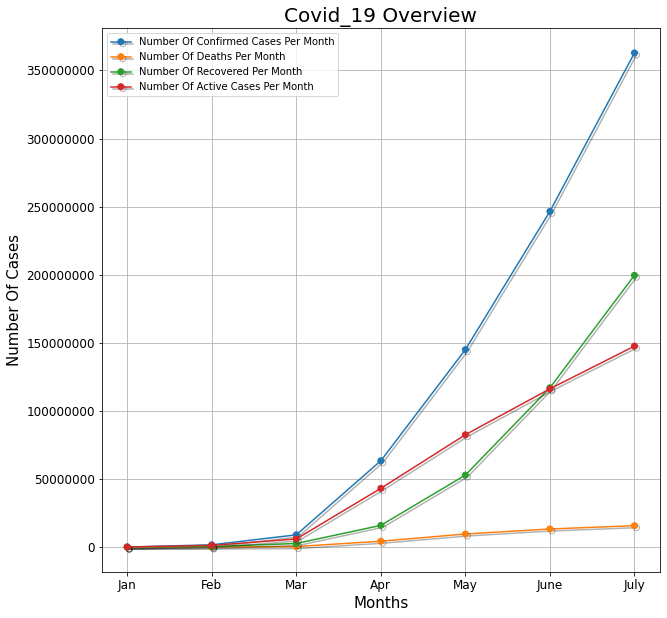

In [8]:
fig = plt.figure()
Covid_19_df.plot(figsize = (10, 10), x = 'Months', marker='o', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
plt.title('Covid_19 Overview', fontsize=20)
plt.xlabel('Months', fontsize=15)
plt.ylabel('Number Of Cases', fontsize=15)
plt.ticklabel_format(axis='y', style='plain', scilimits=(0,0), useOffset=False, useLocale=None, useMathText=None)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
plt.grid()
plt.show()
#plt.savefig('Covid_19 Overview.jpg')

### 9) Gráfica correspondiente al número de casos confirmados por mes.

<Figure size 432x288 with 0 Axes>

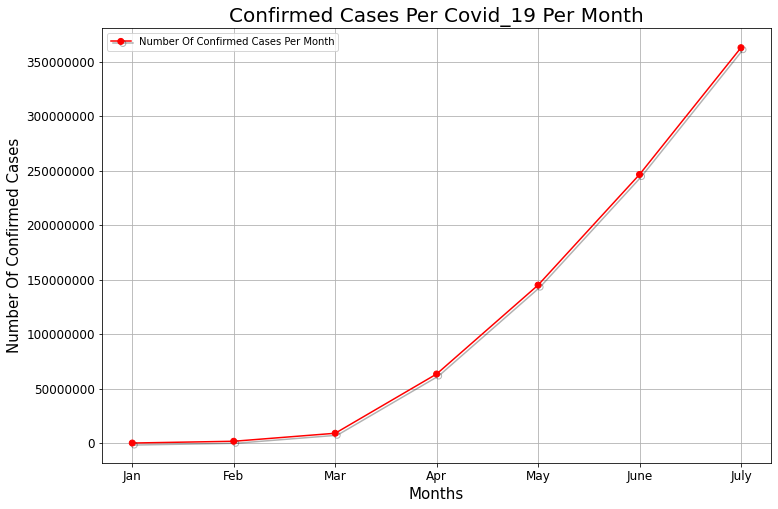

In [9]:
fig = plt.figure()
Covid_19_df.plot(figsize = (12, 8), x='Months', y = 'Number Of Confirmed Cases Per Month',\
                 kind='line', marker='o', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()], color='red')
plt.title('Confirmed Cases Per Covid_19 Per Month', fontsize=20)
plt.xlabel('Months', fontsize=15)
plt.ylabel('Number Of Confirmed Cases', fontsize=15)
plt.ticklabel_format(axis='y', style='plain', scilimits=(0,0), useOffset=False, useLocale=None, useMathText=None)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
plt.grid()
plt.show()
#plt.savefig('Confirmed Cases Per Covid_19 Per Month.jpg')

### 10) Gráfica correspondiente al número de muertes por mes

<Figure size 432x288 with 0 Axes>

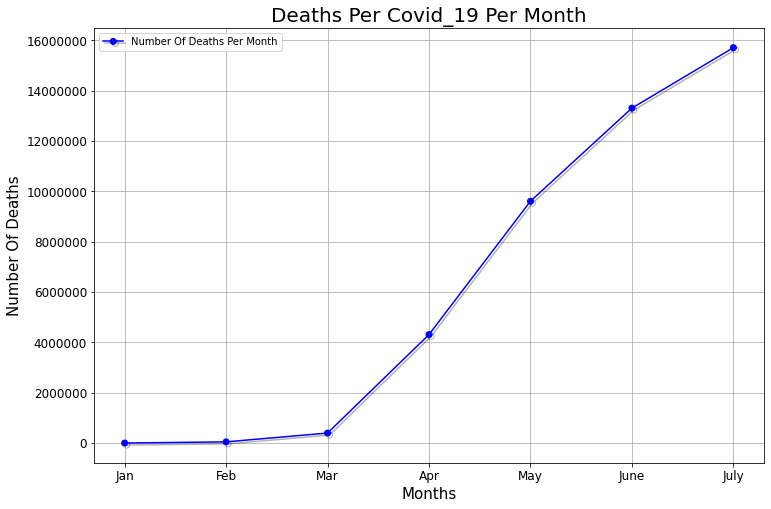

In [10]:
fig = plt.figure()
Covid_19_df.plot(figsize = (12, 8), x='Months', y = 'Number Of Deaths Per Month',\
                 kind='line', marker='o', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()], color='blue')
plt.title('Deaths Per Covid_19 Per Month', fontsize=20)
plt.xlabel('Months', fontsize=15)
plt.ylabel('Number Of Deaths', fontsize=15)
plt.ticklabel_format(axis='y', style='plain', scilimits=(0,0), useOffset=False, useLocale=None, useMathText=None)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
plt.grid()
plt.show()
#plt.savefig('Deaths Per Covid_19 Per Month.jpg')

### 11) Gráfica correspondiente al número de personas recuperadas por mes.

<Figure size 432x288 with 0 Axes>

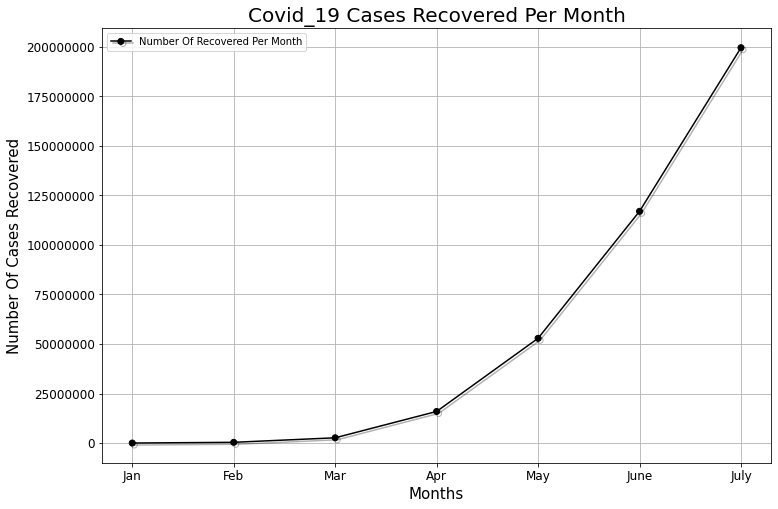

In [11]:
fig = plt.figure()
Covid_19_df.plot(figsize=(12, 8), x='Months', y='Number Of Recovered Per Month',\
                 kind='line', marker='o', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()], color = 'black')
plt.title('Covid_19 Cases Recovered Per Month', fontsize=20)
plt.xlabel('Months', fontsize=15)
plt.ylabel('Number Of Cases Recovered', fontsize=15)
plt.ticklabel_format(axis='y', style='plain', scilimits=(0,0), useOffset=False, useLocale=None, useMathText=None)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
plt.grid()
plt.show()
#plt.savefig('Covid_19 Cases Recovered Per Month.jpg')

### 12) Gráfica correspondiente a los casos activos de cada mes.

<Figure size 432x288 with 0 Axes>

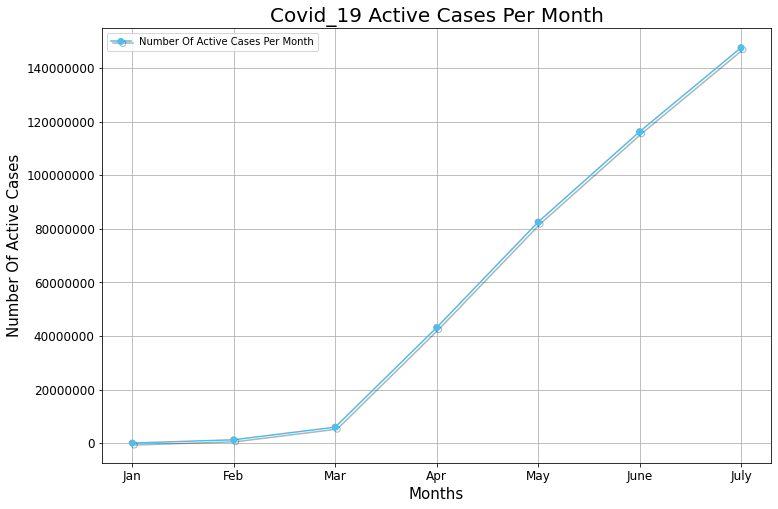

In [12]:
fig = plt.figure()
Covid_19_df.plot(figsize = (12, 8), x='Months', y='Number Of Active Cases Per Month',\
                 kind='line', marker='o', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()], color = '#4DBEEE')
plt.title('Covid_19 Active Cases Per Month', fontsize=20)
plt.xlabel('Months', fontsize=15)
plt.ylabel('Number Of Active Cases', fontsize=15)
plt.ticklabel_format(axis='y', style='plain', scilimits=(0,0), useOffset=False, useLocale=None, useMathText=None)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
plt.grid()
plt.show()
#plt.savefig('Covid_19 Active Cases Per Month.jpg')

### 13) Análisis Estadístico.

Con las funciones .sum(), .mean(), .std() se calculó los casos totales, los promedios y las desviaciones de cada criterio. 

In [13]:
# Casos Totales.

Total_Confirmed_Cases = Covid_19_df['Number Of Confirmed Cases Per Month'].sum()
Total_Deaths = Covid_19_df['Number Of Deaths Per Month'].sum()
Total_Recovered_Cases = Covid_19_df['Number Of Recovered Per Month'].sum()
Total_Active_Cases = Covid_19_df['Number Of Active Cases Per Month'].sum()

# Promedios

Average_Confirmed_Cases = Covid_19_df['Number Of Confirmed Cases Per Month'].mean()
Average_Deaths = Covid_19_df['Number Of Deaths Per Month'].mean()
Average_Recovered_Cases = Covid_19_df['Number Of Recovered Per Month'].mean()
Average_Active_Cases = Covid_19_df['Number Of Active Cases Per Month'].mean()

# Desviación Estándar

Deviation_Confirmed_Cases = Covid_19_df['Number Of Confirmed Cases Per Month'].std()
Deviation_Deaths = Covid_19_df['Number Of Deaths Per Month'].std()
Deviation_Recovered_Cases = Covid_19_df['Number Of Recovered Per Month'].std() 
Deviation_Active_Cases = Covid_19_df['Number Of Active Cases Per Month'].std()

### 14) En esta sección procedemos a realizar el análisis del otro archivo csv (full_grouped.csv).

In [14]:
World_Data = pd.read_csv('full_grouped.csv')
World_Data

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa


### 15) El análisis de este archivo .csv está enfocado en las datos estadísticos de cada región a nivel mundial.

Con la ayuda de la funciones .groupby() y .sum() agrupamos y sumamos los datos bajo el criterio de la columna WHO Region del Dataframe anterior, esto quiere decir que si en la columna de "WHO Region" encuentra una misma región va a sumar todos los datos de las otras columnas.

In [15]:
Regions = World_Data.groupby(by="WHO Region").sum().groupby(level=[0]).cumsum()
Regions

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
WHO Region,,,,,,,
Africa,21791827,439978,11193730,10158119,723540,12223,440645
Americas,402261194,19359292,157069444,225832458,8842455,342732,4468616
Eastern Mediterranean,74082892,1924029,48050703,24108160,1490854,38339,1201400
Europe,248879793,19271040,123202075,106406678,3316928,211144,1993723
South-East Asia,55118365,1458134,30030327,23629904,1835296,41349,1156933
Western Pacific,26374411,932430,18861950,6580031,291879,8232,206742


### 16) Transformar el anterior DataFrame en listas.

Al momento de agrupar los datos bajo una categoría o columna, pandas convierte dicha columna en una columna falsa por lo que no permite usarla para futuras operaciones. Por ello, realizo la transformación a listas y luego creo un DataFrame en el que si pueda emplear esa columna.

In [16]:
WHO_Region = ['Africa', 'America', 'Eastern Mediterranean', 'Europe', 'South-East Asia', 'Western Pacific']
Confirmed = Regions['Confirmed'].tolist()
Deaths = Regions['Deaths'].tolist()
Recovered = Regions['Recovered'].tolist()
Active = Regions['Active'].tolist()
dict = {'WHO Region': WHO_Region, 'Confirmed': Confirmed, 'Deaths': Deaths, 'Recovered': Recovered, 'Active': Active}
Final_df = pd.DataFrame(dict)
Final_df

,WHO Region,Confirmed,Deaths,Recovered,Active
0,Africa,21791827,439978,11193730,10158119
1,America,402261194,19359292,157069444,225832458
2,Eastern Mediterranean,74082892,1924029,48050703,24108160
3,Europe,248879793,19271040,123202075,106406678
4,South-East Asia,55118365,1458134,30030327,23629904
5,Western Pacific,26374411,932430,18861950,6580031


### 17) Gráfica de casos confirmados por regiones geográficas a nivel mundial.

<Figure size 432x288 with 0 Axes>

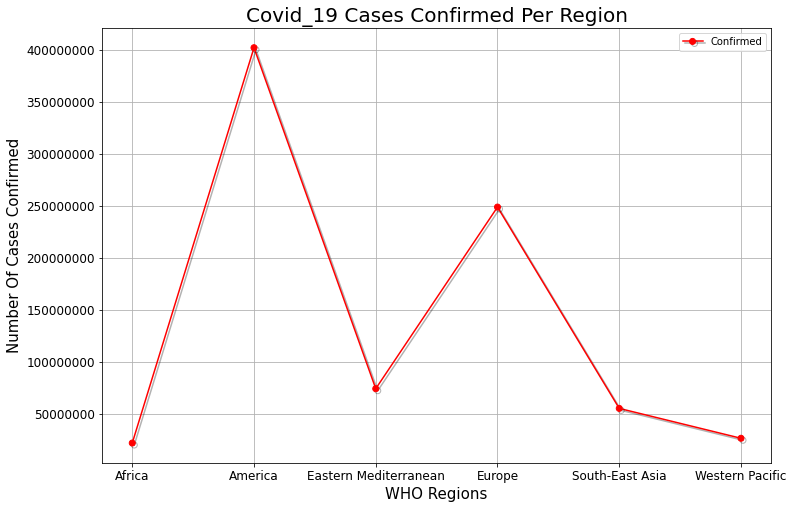

In [29]:
fig = plt.figure()
Final_df.plot(figsize=(12, 8), x='WHO Region', y='Confirmed',\
                 kind='line', marker='o', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()], color = 'red')
plt.title('Covid_19 Cases Confirmed Per Region', fontsize=20)
plt.xlabel('WHO Regions', fontsize=15)
plt.ylabel('Number Of Cases Confirmed', fontsize=15)
plt.ticklabel_format(axis='y', style='plain', scilimits=(0,0), useOffset=False, useLocale=None, useMathText=None)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
plt.grid()
plt.show()
#plt.savefig('Covid_19 Cases Confirmed Per Region.jpg')

### 18) Gráfica de muertes por regiones geográficas a nivel mundial.

<Figure size 432x288 with 0 Axes>

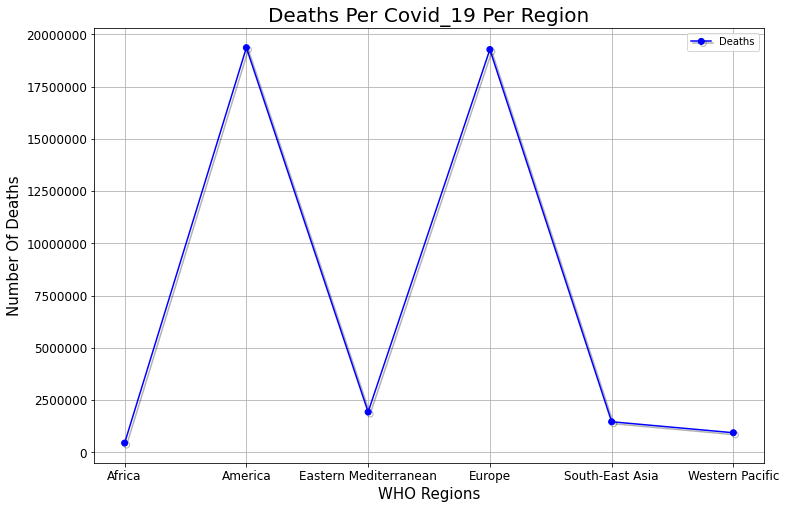

In [31]:
fig = plt.figure()
Final_df.plot(figsize = (12, 8), x='WHO Region', y = 'Deaths',\
                 kind='line', marker='o', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()], color='blue')
plt.title('Deaths Per Covid_19 Per Region', fontsize=20)
plt.xlabel('WHO Regions', fontsize=15)
plt.ylabel('Number Of Deaths', fontsize=15)
plt.ticklabel_format(axis='y', style='plain', scilimits=(0,0), useOffset=False, useLocale=None, useMathText=None)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
plt.grid()
plt.show()
#plt.savefig('Deaths Per Covid_19 Per Region.jpg')

### 19) Gráfica de recuperados por regiones geográficas a nivel mundial.

<Figure size 432x288 with 0 Axes>

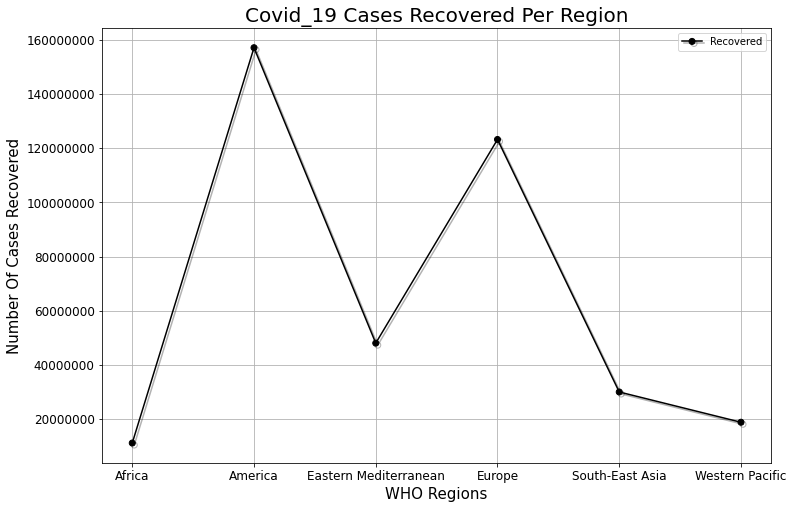

In [34]:
fig = plt.figure()
Final_df.plot(figsize=(12, 8), x='WHO Region', y='Recovered',\
                 kind='line', marker='o', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()], color = 'black')
plt.title('Covid_19 Cases Recovered Per Region', fontsize=20)
plt.xlabel('WHO Regions', fontsize=15)
plt.ylabel('Number Of Cases Recovered', fontsize=15)
plt.ticklabel_format(axis='y', style='plain', scilimits=(0,0), useOffset=False, useLocale=None, useMathText=None)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
plt.grid()
plt.show()
#plt.savefig('Covid_19 Cases Recovered Per Region.jpg')

### 20) Gráfica de casos activos por regiones geográficas a nivel mundial.

<Figure size 432x288 with 0 Axes>

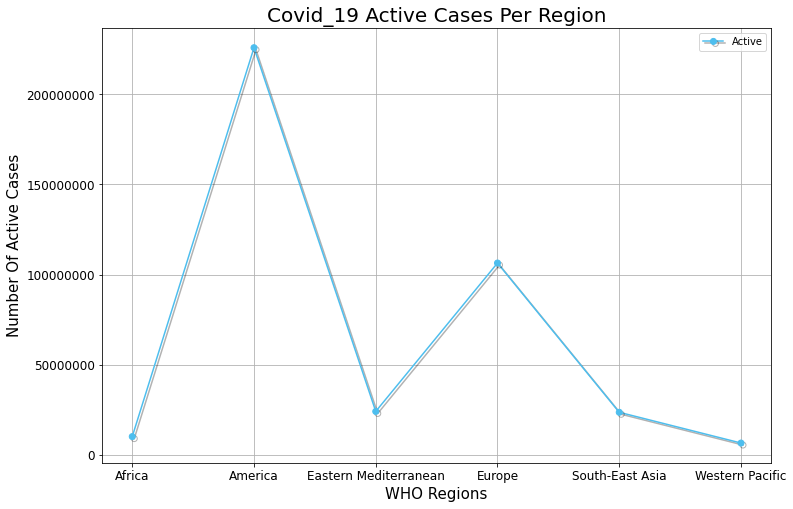

In [35]:
fig = plt.figure()
Final_df.plot(figsize=(12, 8), x='WHO Region', y='Active',\
                 kind='line', marker='o', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()], color = '#4DBEEE')
plt.title('Covid_19 Active Cases Per Region', fontsize=20)
plt.xlabel('WHO Regions', fontsize=15)
plt.ylabel('Number Of Active Cases', fontsize=15)
plt.ticklabel_format(axis='y', style='plain', scilimits=(0,0), useOffset=False, useLocale=None, useMathText=None)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
plt.grid()
#plt.show()
plt.savefig('Covid_19 Active Cases Per Region.jpg')

### 21) Análisis estadísticos

Para esta sección se aplicó la misma lógica del análisis anterior. 

In [36]:
# Casos Totales.

Total_Confirmed_Cases_R = Final_df['Confirmed'].sum()
Total_Deaths_R = Final_df['Deaths'].sum()
Total_Recovered_Cases_R = Final_df['Recovered'].sum()
Total_Active_Cases_R = Final_df['Active'].sum()

# Promedios

Average_Confirmed_Cases_R = Final_df['Confirmed'].mean()
Average_Deaths_R = Final_df['Deaths'].mean()
Average_Recovered_Cases_R = Final_df['Recovered'].mean()
Average_Active_Cases_R = Final_df['Active'].mean()

# Desviación Estándar

Deviation_Confirmed_Cases_R = Final_df['Confirmed'].std()
Deviation_Deaths_R = Final_df['Deaths'].std()
Deviation_Recovered_Cases_R = Final_df['Recovered'].std() 
Deviation_Active_Cases_R = Final_df['Active'].std()

### 22) Generamos el archivo .txt en el cuál se registrarán los resultados de los análisis anteriormente realizados.

In [37]:
#En esta sección se encuentra el contenido del archivo txt.

Title = '"Analysis Result"\n'

Text_Intro = '\nThis file contains the results of the statistical analysis of COVID_19. \
The criteria taken into account are as follows: Confirmed cases per month, \
number of deaths per month, number of people recovered per month and number of active cases in each month. \
The same criteria were also taken into account but by regions at the global level \
(regions that were assigned by the World Health Organization).\n'

Title_1 = '\n                       "COVID_19 Results Per Month"\n'

Title_Table = '\n              "Total Cases COVID_19"\n'
T_C_Cases =     ' Total Confirmed Cases        \t  828508482\n'
T_Deaths =      ' Total Number Of Deaths       \t  43384903\n'
T_Recovered =   ' Total Number Of Recovered    \t  388408229\n'
T_Active =      'Total Number Of Active Cases  \t  396715350\n'

Title_Table1 = '\n                     "COVID_19 Averages"\n'
A_C =           'Average Confirmed Cases Per Month    \t  118358354.57142857\n'
A_D =           '     Average Deaths Per Month        \t  6197843.285714285\n'
A_R =           '   Average Recoveries Per Month      \t  55486889.85714286\n'
A_A =           '  Average Active Cases Per Month     \t  56673621.428571425\n'

Title_Table2 = '\n              "COVID_19 Standard Deviations"\n'
D_C =     'Deviation Confirmed Cases Per Month     \t  141145313.57928267\n'
D_D =     '    Deviation Deaths Per Month          \t  6659867.854664253\n'
D_R =     '   Deviation Recovered Per Month        \t  76407793.36481752\n'
D_A =     '  Deviation Active Cases Per Month      \t 59881596.278209\n'

Title_2 = '\n                    "COVID_19 Results Per WHO Region "\n'

Title_Table3 = '\n      "Total Cases COVID_19 (WHO REGION)"\n'
T_C_Cases_1 =     '   Total Confirmed Cases        \t  828508482\n'
T_Deaths_1 =      '  Total Number Of Deaths        \t  43384903\n'
T_Recovered_1 =   ' Total Number Of Recovered      \t  388408229\n'
T_Active_1 =      'Total Number Of Active Cases    \t  396715350\n'

Title_Table4 = '\n                           "COVID_19 Averages"\n'
A_C_R =           'Average Confirmed Cases Per WHO Region    \t  138084747.0\n'
A_D_R =           '     Average Deaths Per WHO Region        \t  7230817.166666667\n'
A_R_R =           '   Average Recoveries Per WHO Region      \t  64734704.833333336\n'
A_A_R =           ' Average Active Cases Per WHO Region      \t   66119225.0\n'

Title_Table5 = '\n                    "COVID_19 Standard Deviations"\n'
D_C_R =     'Deviation Confirmed Cases Per WHO Region    \t  154303362.09211785\n'
D_D_R =     '    Deviation Deaths Per WHO Region         \t  9373771.031303003\n'
D_R_R =     '   Deviation Recovered Per WHO Region       \t  60659430.94236634\n'
D_A_R =     '  Deviation Active Cases Per WHO Region     \t  86461816.60470434\n'

Text_1 = '\nBased on the information provided by the graphs and tables above, we can conclude the following:\n'
Text_2 = '\nThe growth of COVID_19 was exponentially which tells us that the transmission of the virus was very \
fast and besides that, any person of any age can easily contract it. We can also notice that the data are scattered. \
This shows that there were days, weeks or even months in which the level of affection was quite critical, \
which demonstrates that Covid_19 is a virus with pandemic potential and quite deadly for the population. \
In addition, we can also see that in some regions of the world, COVID_19 had a greater impact. \
Examples of this are the regions of America and Europe. \
The causes of these regions where the virus had a greater impact may be due to the fact that the preventive \
sanitary measures were not rigorous enough or it was due to negligence and lack of awareness of the population, \
since social awareness is fundamental because one has to know that preventive measures are not only taken to take \
care of oneself, but also to protect others.\n' 

Text_3 = '\nAuthor: Brayan Andres Ortiz Gonzalez.'
Text_4 = '\nDate created: 13/09/2022'

### 23) Para la representación de la información de forma organizada estilo tabla, cree las variables que se verán a continuación.

In [38]:
Table = Title_Table + T_C_Cases + T_Deaths + T_Recovered + T_Active
Table1 = Title_Table1 + A_C + A_D + A_R + A_A
Table2 = Title_Table2 + D_C + D_D + D_R + D_A
Table3 = Title_Table3 + T_C_Cases_1 + T_Deaths_1 + T_Recovered_1 + T_Active_1
Table4 = Title_Table4 + A_C_R + A_D_R + A_R_R + A_A_R
Table5 = Title_Table5 + D_C_R + D_D_R + D_R_R + D_A_R

### 24) El contenido del archivo txt, está conformado por la suma de cadenas de caracteres como se evidencia a continuación.

In [39]:
Content = Title + Text_Intro + Title_1 + Table + Table1 + Table2 + Title_2 + Table3 + Table4 + Table5 + Text_1 + \
Text_2 + Text_3 + Text_4

### 25) En esta sección creamos el archivo txt.

In [40]:
with open('COVID_19 Analysis Results.txt', 'w') as File_Txt:
    File_Txt.write(Content)
File_Txt.close()